In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [2]:
#Importing data

path = '/Users/alejandroguillen/Documents/Airbnb'

In [3]:
df_airbnb = pd.read_csv(os.path.join(path,'Data','Prepared','Airbnb_listings.csv'), index_col=False)

In [4]:
#Checking results

df_airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/19,0,2,0,0
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,6/21/22,0,3,325,1
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,5/14/23,0,1,268,3
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,8/10/22,0,1,275,1
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,4/28/23,0,1,38,23


## Exploring relationships

In [5]:
#Filtering the dataframe so specific columns can be used for visualizations
airbnb_filtered = df_airbnb.copy()
airbnb_filtered = df_airbnb.filter(items=['neighbourhood_group', 'neighbourhood', 'latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])

In [6]:
#Check results
airbnb_filtered.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0,2,0,0
1,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,0,3,325,1
2,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,0,1,268,3
3,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,0,1,275,1
4,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,0,1,38,23


/var/folders/9m/8nqk2r316sbdm8n2bttyp65c0000gn/T/ipykernel_28976/220860096.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(airbnb_filtered.corr())


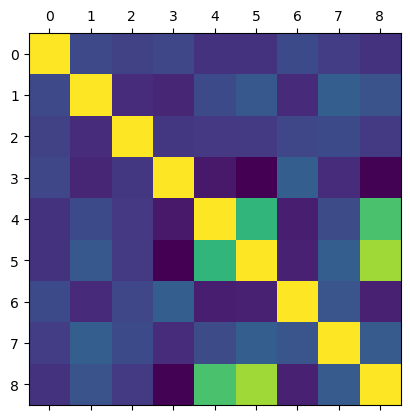

In [7]:
# Create a correlation heatmap using matplotlib

plt.matshow(airbnb_filtered.corr())
plt.show()

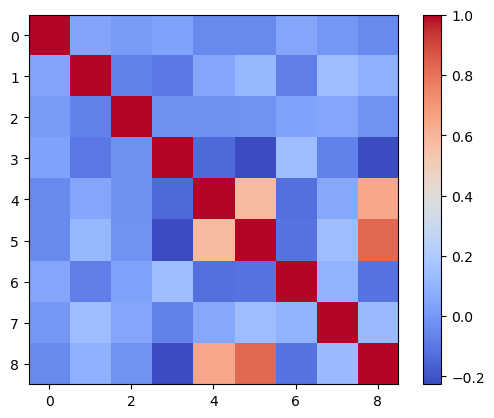

In [8]:
#Silencing the warning by specifying the value of the numeric_only parameter to True and also using  set_alpha() method to set the opacity of the lines in the colorbar

plt.imshow(airbnb_filtered.corr(numeric_only=True), cmap='coolwarm')
plt.colorbar().set_alpha(0.1)

In [9]:
#current dir
cwd = os.getcwd()
cwd

'/Users/alejandroguillen/Documents/Airbnb/Scripts'

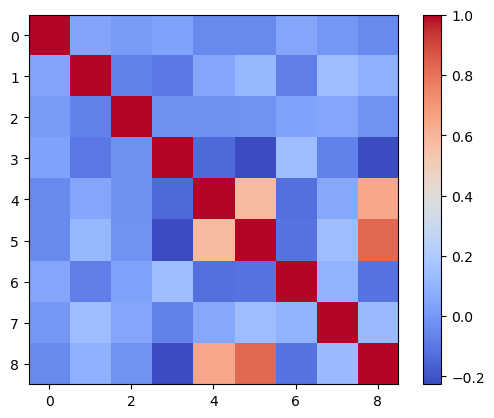

In [10]:
plt.imshow(airbnb_filtered.corr(numeric_only=True), cmap='coolwarm')
plt.colorbar().set_alpha(0.1)
plt.savefig("out.png")

## Correlation Matrix Heatmap

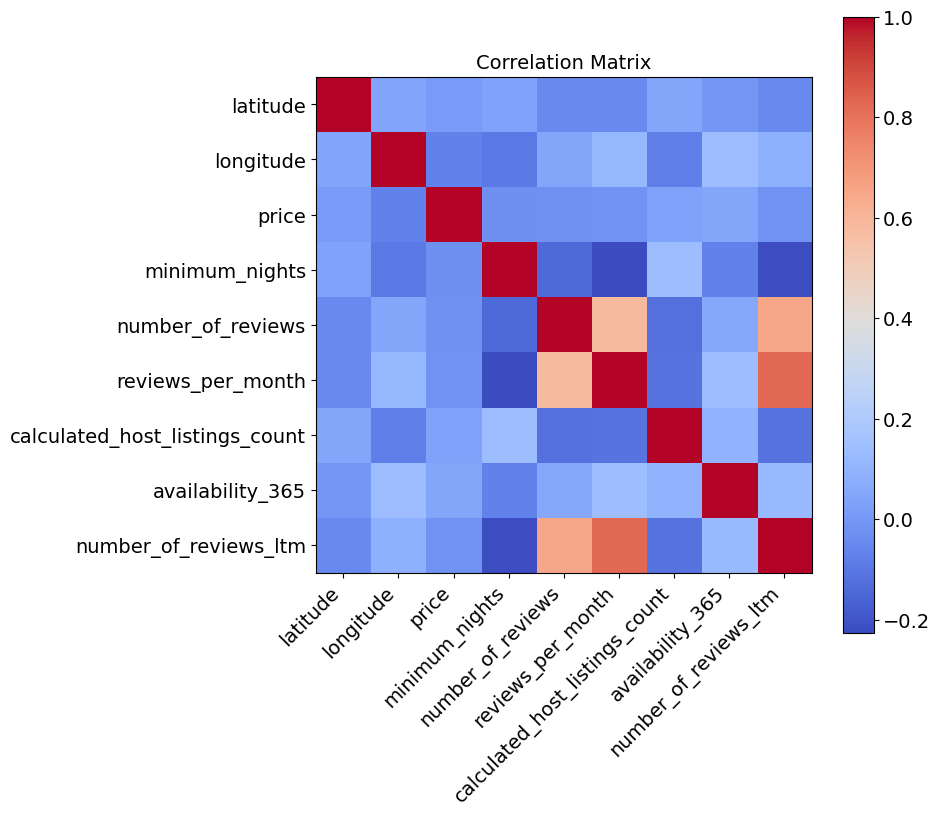

In [11]:
# Create a correlation matrix
corr = airbnb_filtered.corr(numeric_only=True)

# Create a figure and a subplot
f, ax = plt.subplots(figsize=(8, 8))

# Add the heatmap
plt.imshow(corr, cmap='coolwarm')

# Add labels and title
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45, ha='right')
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
plt.title('Correlation Matrix', fontsize=14)

# Add colorbar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Show the plot
plt.show()


In [12]:
airbnb_filtered.corr()

/var/folders/9m/8nqk2r316sbdm8n2bttyp65c0000gn/T/ipykernel_28976/446926522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_filtered.corr()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.044527,0.012258,0.033639,-0.048226,-0.046240,0.046880,-0.003599,-0.046300
longitude,0.044527,1.000000,-0.071326,-0.092358,0.048227,0.112992,-0.081094,0.139025,0.087762
price,0.012258,-0.071326,1.000000,-0.029396,-0.023296,-0.018846,0.033139,0.049591,-0.017268
minimum_nights,0.033639,-0.092358,-0.029396,1.000000,-0.143018,-0.226175,0.138811,-0.070315,-0.218461
number_of_reviews,-0.048226,0.048227,-0.023296,-0.143018,1.000000,0.581780,-0.121906,0.053797,0.647671
reviews_per_month,-0.046240,0.112992,-0.018846,-0.226175,0.581780,1.000000,-0.114787,0.142496,0.824179
calculated_host_listings_count,0.046880,-0.081094,0.033139,0.138811,-0.121906,-0.114787,1.000000,0.095678,-0.112034
availability_365,-0.003599,0.139025,0.049591,-0.070315,0.053797,0.142496,0.095678,1.000000,0.123791
number_of_reviews_ltm,-0.046300,0.087762,-0.017268,-0.218461,0.647671,0.824179,-0.112034,0.123791,1.000000


## Using seaborn to create a correlation matrix

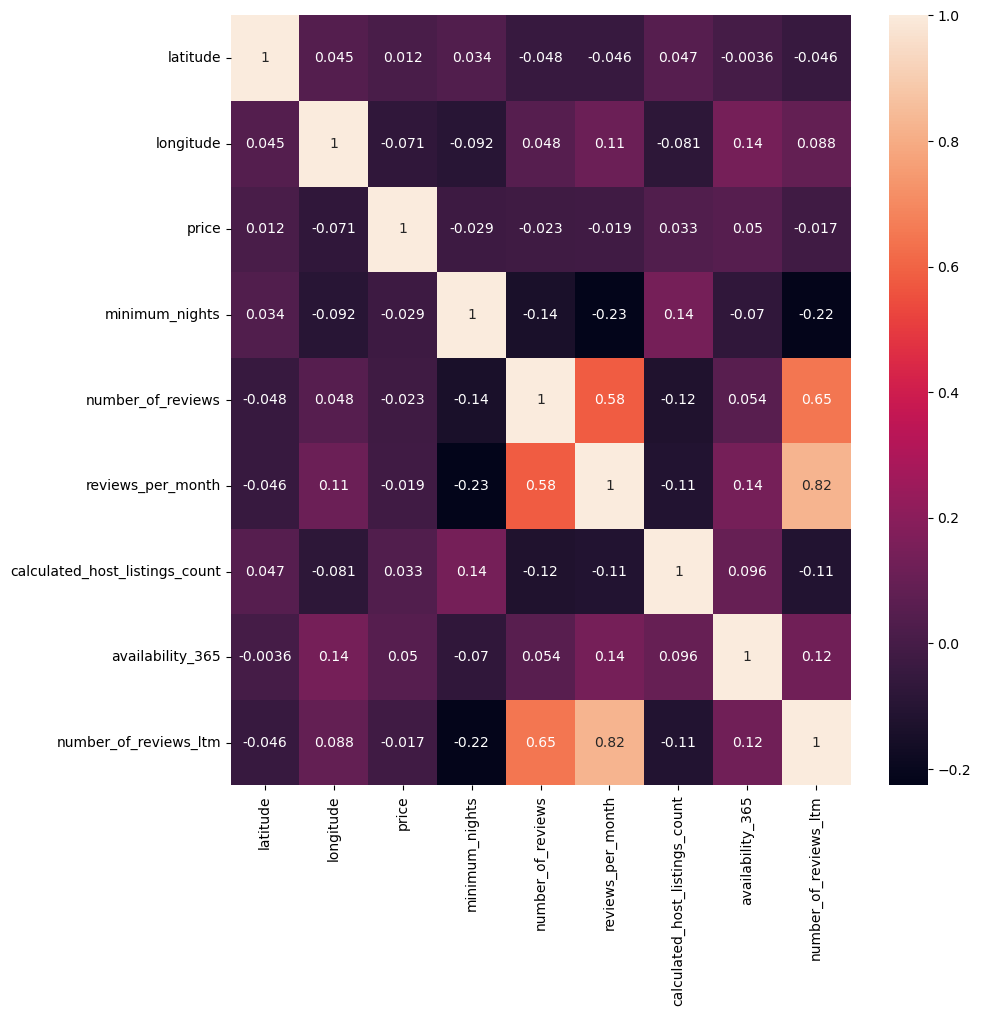

In [13]:
#Create the correlation matrix
corr = airbnb_filtered.corr(numeric_only=True)

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(corr, annot=True, ax=ax)

# Show the plot
plt.show()


#### Note: it seems that there are not strong correlations between prices and availability or minimum nights (which were the variables I thought would have meaningul correlations). Will change the dtypes of the columns room_type and neighbourhood_group to see if I find any correlations in there.

In [14]:
#Checking data types

airbnb_filtered.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [15]:
# Get the value counts of the neighbourhood_group column
value_counts = airbnb_filtered['neighbourhood_group'].value_counts()

# Print the value counts
print(value_counts)

Manhattan        18093
Brooklyn         16337
Queens            6968
Bronx             1711
Staten Island      432
Name: neighbourhood_group, dtype: int64


In [16]:
# Get the value counts of the neighbourhood column
value_counts_1 = airbnb_filtered['neighbourhood'].value_counts()

# Print the value counts
print(value_counts_1)

Bedford-Stuyvesant        3175
Williamsburg              2588
Harlem                    2084
Midtown                   2079
Bushwick                  1827
                          ... 
Chelsea, Staten Island       1
Neponsit                     1
New Dorp                     1
Fort Wadsworth               1
Lighthouse Hill              1
Name: neighbourhood, Length: 223, dtype: int64


In [17]:
# Get the value counts of the neighbourhood_group column
value_counts_2 = airbnb_filtered['room_type'].value_counts()

# Print the value counts
print(value_counts_2)

Entire home/apt    24640
Private room       18170
Shared room          580
Hotel room           151
Name: room_type, dtype: int64


In [18]:
# Create a dictionary to map the old values to the new values
mapping = {
    'neighbourhood_group': {
        'Manhattan': 1,
        'Brooklyn': 2,
        'Queens': 3,
        'Bronx': 4,
        'Staten Island': 5
    },
    'room_type': {
        'Entire home/apt': 1,
        'Private room': 2,
        'Shared room': 3,
        'Hotel room': 4
    }
}

# Apply the mapping to the DataFrame
airbnb_filtered = airbnb_filtered.replace(mapping)

# Convert the neighbourhood_group and room_type columns to integers
airbnb_filtered['neighbourhood_group'] = airbnb_filtered['neighbourhood_group'].astype('int64')
airbnb_filtered['room_type'] = airbnb_filtered['room_type'].astype('int64')

# Print the DataFrame
print(airbnb_filtered)


       neighbourhood_group       neighbourhood   latitude  longitude  \
0                        2  Bedford-Stuyvesant  40.685350 -73.955120   
1                        1             Midtown  40.753560 -73.985590   
2                        1     Lower East Side  40.722070 -73.989760   
3                        2         Sunset Park  40.662650 -73.994540   
4                        1           Chinatown  40.717800 -73.993200   
...                    ...                 ...        ...        ...   
43536                    2            Canarsie  40.633458 -73.899472   
43537                    2          Park Slope  40.677256 -73.981435   
43538                    1        East Village  40.732530 -73.989880   
43539                    2            Canarsie  40.638210 -73.915920   
43540                    1             Midtown  40.765086 -73.976717   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
0              2     60              30               

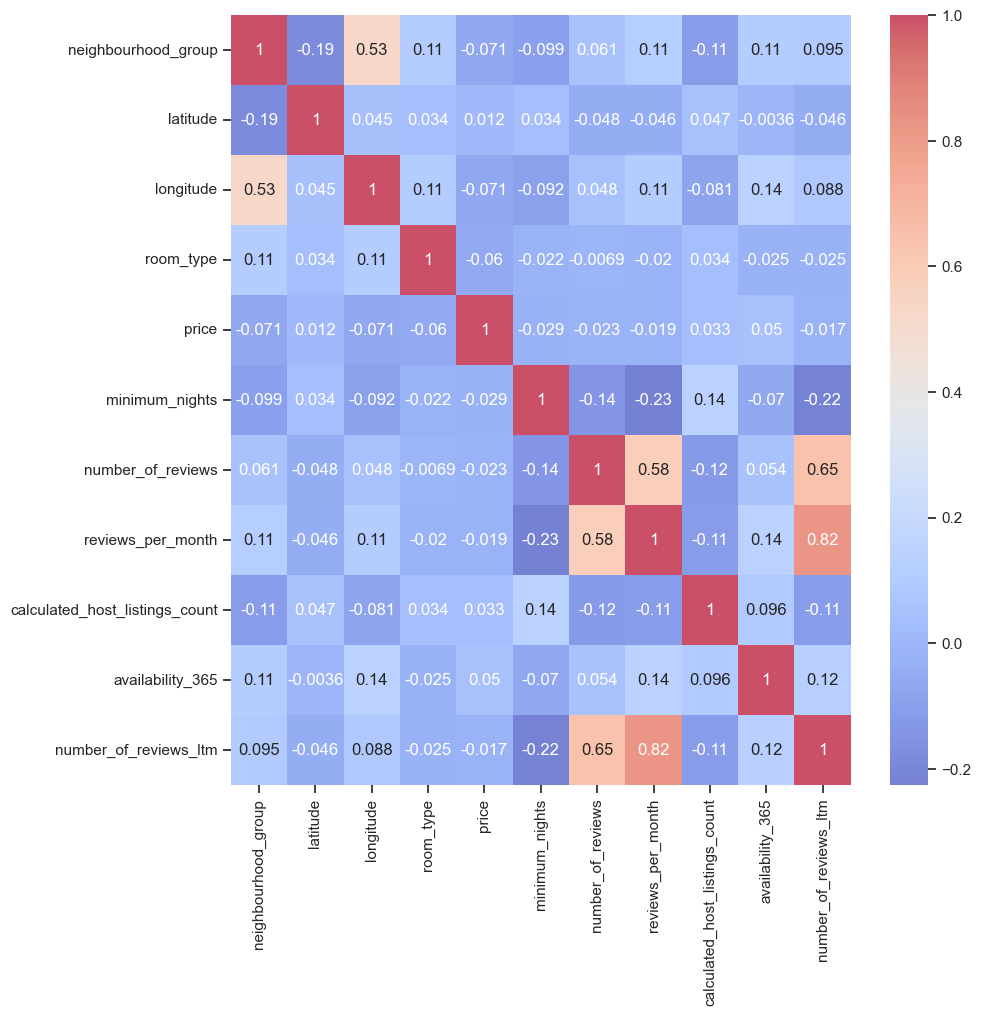

In [33]:
# Create the correlation matrix
corr = airbnb_filtered.corr(numeric_only=True)

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(corr, annot=True, cmap='coolwarm', alpha=0.7, ax=ax)

# Show the plot
plt.show()

In [20]:
plt.savefig(os.path.join(path,'Visualizations', 'heatmap.png'))

<Figure size 640x480 with 0 Axes>

#### Note: no strong correlations found between prices and room type or neighbourhood group.

## Scatterplots

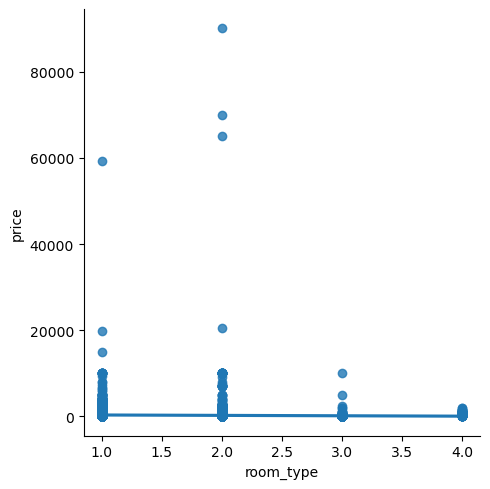

In [21]:
# Create a scatterplot for the "room_type" and "price" columns in seaborn

sns.lmplot(x = 'room_type', y = 'price', data = airbnb_filtered)

#### Note: it seems that room types that are 'Entire home/apt' are the most popular ones. There are also outliers in both 'entire home/apt' and 'private room' types.

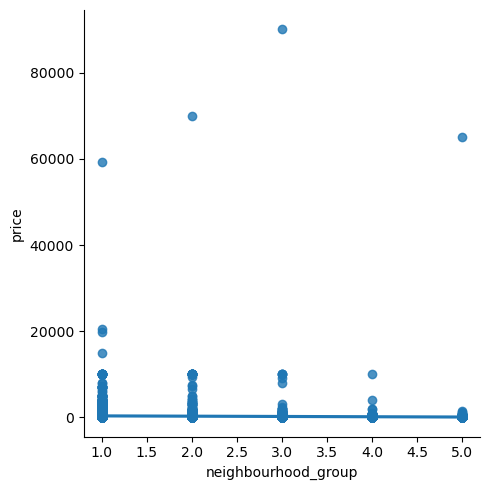

In [22]:
# Create a scatterplot for the "neighbourhood_group" and "price" columns in seaborn

sns.lmplot(x = 'neighbourhood_group', y = 'price', data = airbnb_filtered)


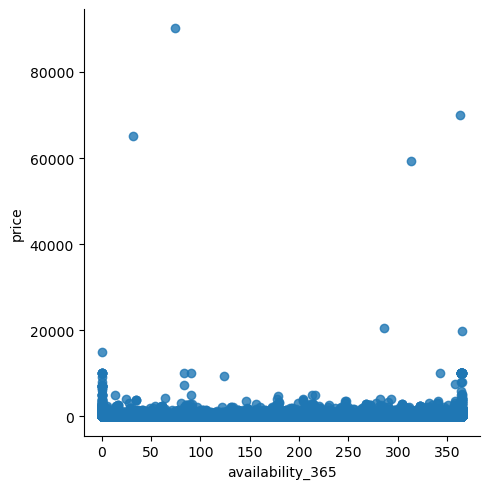

In [23]:
# Create a scatterplot for the "availability_365" and "price" columns in seaborn

sns.lmplot(x = 'availability_365', y = 'price', data = airbnb_filtered)

#### Note: it seems that in the 2nd and 3rd scatterplot, variables did not show any strong correlation. There are some outliers, but focusing on the normal values, for now we can only say that Manhattan neighbourhood is the most popular one and that most rooms have availability for most of the year at a reasonable price range.b

## Pairplot

In [24]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_airbnb[['price', 'number_of_reviews', 'minimum_nights','availability_365']]

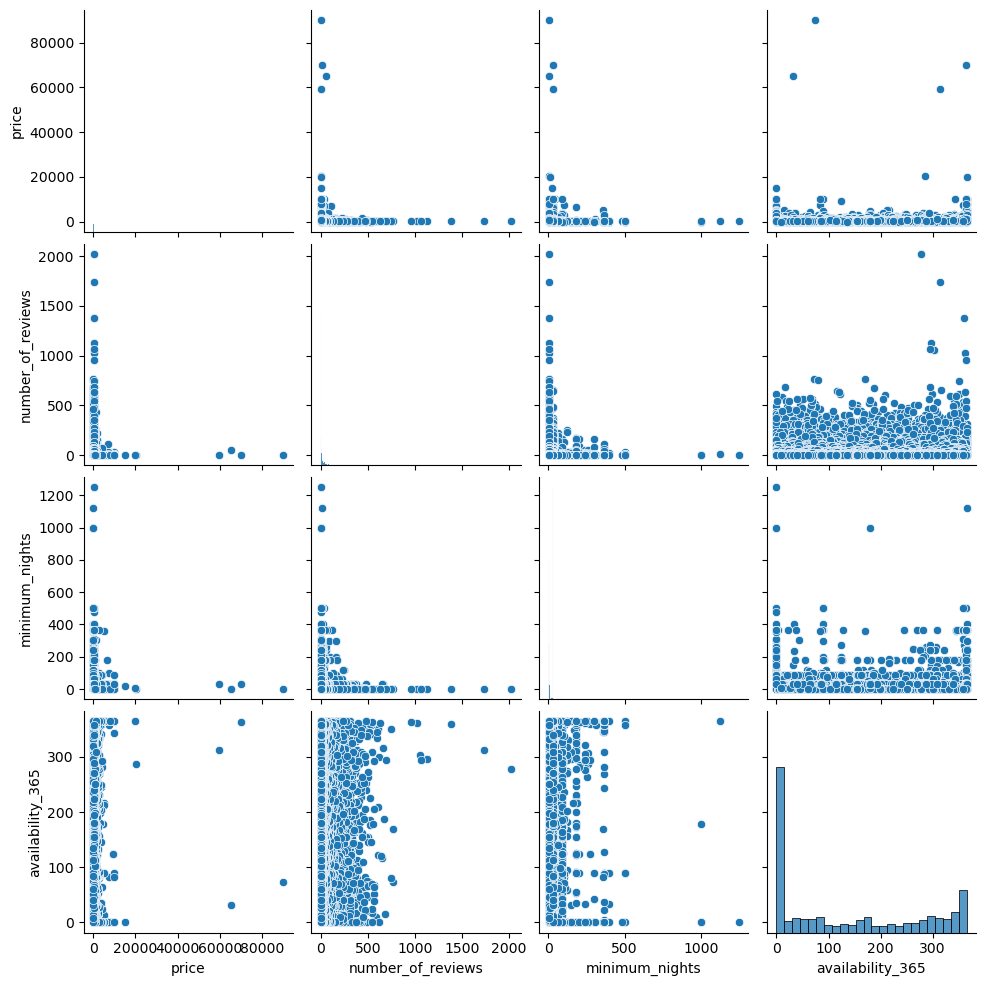

In [25]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### Note: I'd like to analyze further how the reviews would give an insights in correlation to availability or price (or even neighbourhoods). Since the previous graphs did not show any meaningful correlations or insights, I might use these other variables (reviews in combination with something else) to see if there are any trends or meaningful patterns.

## Categorical Plot

<Axes: xlabel='availability_365', ylabel='Count'>

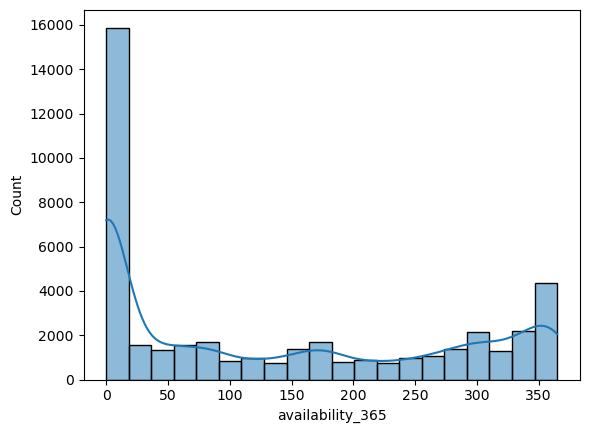

In [26]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(airbnb_filtered['availability_365'], bins = 20, kde = True)


<Axes: xlabel='price', ylabel='Count'>

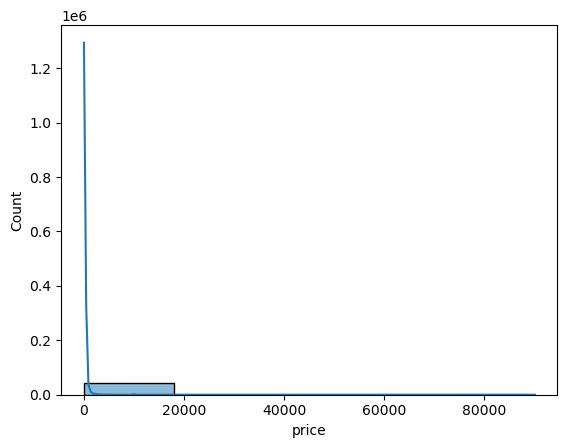

In [27]:
sns.histplot(airbnb_filtered['price'], bins = 5, kde = True)


<Axes: xlabel='number_of_reviews', ylabel='Count'>

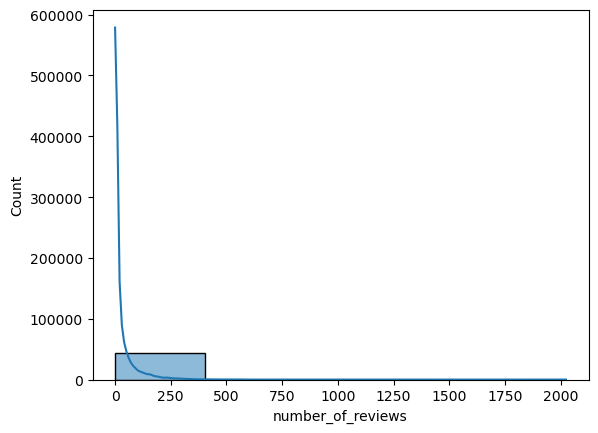

In [28]:
sns.histplot(airbnb_filtered['number_of_reviews'], bins = 5, kde = True)

In [29]:
airbnb_filtered.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

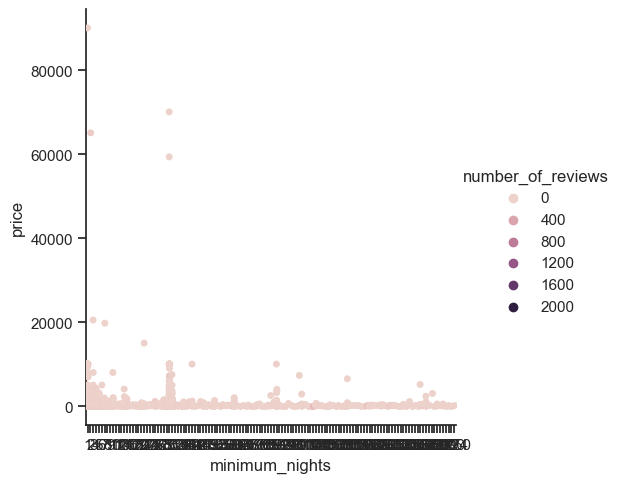

In [30]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="minimum_nights", y="price", hue="number_of_reviews", data=airbnb_filtered)


#### Notes: in general, the data shows that there is not much activity overall. Therefore, finding meaningful results are getting a little harder and I would have to experiment with different graphs to see what other insights I could get from the data.

### Final thoughts: 
#### Answer to some key questions and hypotheses will be made after I dig more into this data.